<h1 style="color:red;font-size:46px;text-align:center;">Klinikbewertungen.de<h1/>

<h1 align=center><font size = 6, color = blue>Exploratory Data Analysis-1</font></h1>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [4]:
df = pd.read_csv("../../Data Wrangling/klinik_bewertungen_afterWrangling.csv")
df.head(10)

,Name der Klinik,Titel,Datum,Fachbereich,Erfahrungsbericht,Gesamtzufriedenheit,Qualität der Beratung,Mediz. Behandlung,Verwaltung und Abläufe,Ausstattung und Gestaltung,Polaritiy,Subjectivity,year,month,day,Gesamt,Qualität,Behandlung,Verwaltung,Ausstattung
0,Herzogin Elisabeth Hospital,Superklinik,2021-06-07,Orthopädie,Bestens durchorganisiert.gutes Personal geht i...,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,0.000000,0.0,2021,6,7,100.0,100.0,100.0,100.0,100.0
1,Herzogin Elisabeth Hospital,Kranken- oder Hotelzimmer?,2021-05-25,Unfallchirurgie,Bin nach einem Autounfall im HEH gewesen und h...,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,zufrieden,0.340000,0.0,2021,5,25,100.0,100.0,100.0,100.0,67.0
2,Herzogin Elisabeth Hospital,Knie OP,2021-05-11,Orthopädie,Wurde bereits im Sept. 2020 am Knie operiert. ...,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,0.242857,0.0,2021,5,11,100.0,100.0,100.0,100.0,100.0
3,Herzogin Elisabeth Hospital,Beste Erfahrungen im HEH,2021-05-09,Chirurgie,Da ich zeit meines Lebens noch nie einen Krank...,sehr zufrieden,sehr zufrieden,sehr zufrieden,zufrieden,sehr zufrieden,0.536111,0.0,2021,5,9,100.0,100.0,100.0,67.0,100.0
4,Herzogin Elisabeth Hospital,Superkompetent und freundlich,2021-05-07,Gefäßchirurgie,Das gesamte Personal von der Notaufnahme über ...,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,zufrieden,0.428571,0.0,2021,5,7,100.0,100.0,100.0,100.0,67.0
5,Herzogin Elisabeth Hospital,Endlich eine Diagnose,2021-05-05,Rheuma,Seit über 10 Jahren lebe ich mit Symptomen und...,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,zufrieden,0.523333,0.0,2021,5,5,100.0,100.0,100.0,100.0,67.0
6,Herzogin Elisabeth Hospital,Schlecht behandelt,2021-04-15,Unfallchirurgie,Ich war in der Notaufnahme hatte Todes Schmerz...,unzufrieden,unzufrieden,unzufrieden,unzufrieden,weniger zufrieden,-0.575000,0.0,2021,4,15,0.0,0.0,0.0,0.0,33.0
7,Herzogin Elisabeth Hospital,Top Klinik,2021-04-13,Orthopädie,Eine absolut Superklinik.Habe eine neue Hüfte ...,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,0.500000,0.0,2021,4,13,100.0,100.0,100.0,100.0,100.0
8,Herzogin Elisabeth Hospital,Ein angenehmer Aufenthalt,2021-04-13,Gefäßchirurgie,Die Mitarbeiter waren sehr kompetent und sehr ...,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,zufrieden,1.000000,0.0,2021,4,13,100.0,100.0,100.0,100.0,67.0
9,Herzogin Elisabeth Hospital,Die neuen Kopfkissen sind sehr schlecht,2021-04-06,Chirurgie,"Alles in allem wieder eine gute Erfahrung, jed...",zufrieden,sehr zufrieden,sehr zufrieden,zufrieden,weniger zufrieden,0.333333,0.0,2021,4,6,67.0,100.0,100.0,67.0,33.0


<AxesSubplot:xlabel='Polaritiy', ylabel='Count'>

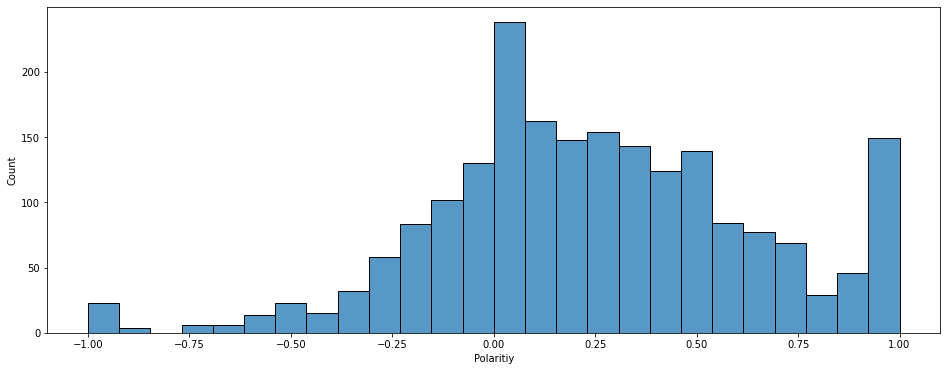

In [5]:
plt.figure(figsize=(16, 6))
sns.histplot(df["Polaritiy"])

In [6]:
df[df['Polaritiy']>=0.1].shape

(1284, 20)

In [7]:
df[df['Gesamt']>=50].shape

(1229, 20)

<AxesSubplot:xlabel='Gesamt', ylabel='Count'>

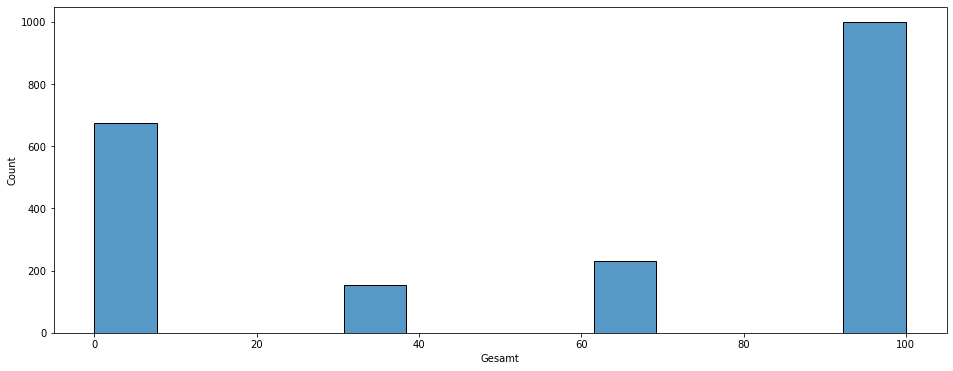

In [8]:
plt.figure(figsize=(16, 6))
sns.histplot(df["Gesamt"])

In [9]:
df_gesamt=df['Gesamt'].value_counts().to_frame()
df_gesamt.index=["sehr zufrieden","unzufrieden","zufrieden","weniger zufrieden"]
df_gesamt

,Gesamt
sehr zufrieden,999
unzufrieden,674
zufrieden,230
weniger zufrieden,155


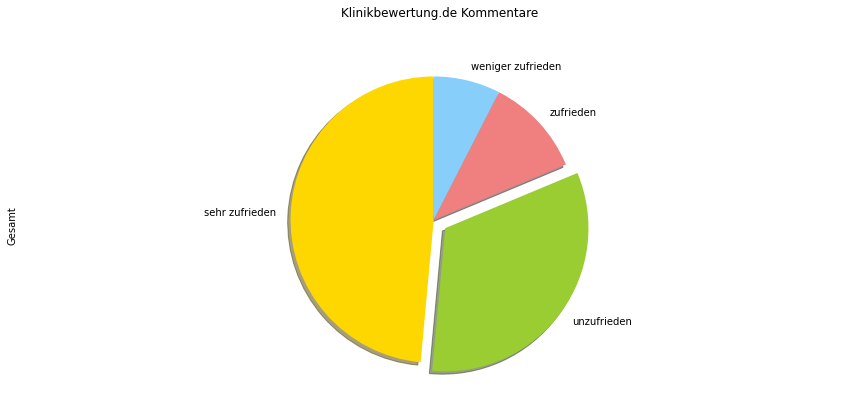

In [10]:

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode_list = [0, 0.1, 0, 0] # ratio for each continent with which to offset each wedge.

df_gesamt['Gesamt'].plot(kind='pie',
                            figsize=(15, 6),
                             
                            startangle=90,    
                            shadow=True,       
                                     # turn off labels on pie chart
                            pctdistance=1.1,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Klinikbewertung.de Kommentare', y=1.12) 

plt.axis('equal') 

# add legend
#plt.legend(labels=df_gesamt.index, loc='upper left') 

plt.show()

In [11]:
gleich=0
for i in range(df.shape[0]):
    if ((df.Polaritiy[i]>=0 and df.Gesamt[i]>50) or (df.Polaritiy[i]<=0 and df.Gesamt[i]<50)):
        gleich+=1  
print('gleich: ', gleich)
print(1725/2058)

gleich:  1655
0.8381924198250729


In [12]:
positive=[]
for i in range(df.shape[0]):
    if (df.Polaritiy[i]>=0):
        positive.append(1)
    else:
        positive.append(0)

In [13]:
df["positive"]=positive
df

,Name der Klinik,Titel,Datum,Fachbereich,Erfahrungsbericht,Gesamtzufriedenheit,Qualität der Beratung,Mediz. Behandlung,Verwaltung und Abläufe,Ausstattung und Gestaltung,...,Subjectivity,year,month,day,Gesamt,Qualität,Behandlung,Verwaltung,Ausstattung,positive
0,Herzogin Elisabeth Hospital,Superklinik,2021-06-07,Orthopädie,Bestens durchorganisiert.gutes Personal geht i...,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,...,0.000000,2021,6,7,100.0,100.0,100.0,100.0,100.0,1
1,Herzogin Elisabeth Hospital,Kranken- oder Hotelzimmer?,2021-05-25,Unfallchirurgie,Bin nach einem Autounfall im HEH gewesen und h...,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,zufrieden,...,0.000000,2021,5,25,100.0,100.0,100.0,100.0,67.0,1
2,Herzogin Elisabeth Hospital,Knie OP,2021-05-11,Orthopädie,Wurde bereits im Sept. 2020 am Knie operiert. ...,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,...,0.000000,2021,5,11,100.0,100.0,100.0,100.0,100.0,1
3,Herzogin Elisabeth Hospital,Beste Erfahrungen im HEH,2021-05-09,Chirurgie,Da ich zeit meines Lebens noch nie einen Krank...,sehr zufrieden,sehr zufrieden,sehr zufrieden,zufrieden,sehr zufrieden,...,0.000000,2021,5,9,100.0,100.0,100.0,67.0,100.0,1
4,Herzogin Elisabeth Hospital,Superkompetent und freundlich,2021-05-07,Gefäßchirurgie,Das gesamte Personal von der Notaufnahme über ...,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,zufrieden,...,0.000000,2021,5,7,100.0,100.0,100.0,100.0,67.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,Psychiatrische Klinik Lüneburg,Hilft nur in Krisen!,2013-07-23,Kind/Jugend-Psych.,Ich war in 2 verschiedenen Häusern. (ehm.) Hau...,weniger zufrieden,weniger zufrieden,zufrieden,unzufrieden,weniger zufrieden,...,0.000000,2013,7,23,33.0,33.0,67.0,0.0,33.0,1
2054,Psychiatrische Klinik Lüneburg,Mir gings schlechter als vorher,2013-03-19,Psychiatrie,Ich war vor kuzen Patientrin auf der Station 1...,unzufrieden,unzufrieden,unzufrieden,unzufrieden,unzufrieden,...,0.050000,2013,3,19,0.0,0.0,0.0,0.0,0.0,1
2055,Psychiatrische Klinik Lüneburg,Eine positive Überraschung!,2009-12-05,Psychiatrie,Ich befinde mich seit einigen Wochen in Behand...,sehr zufrieden,sehr zufrieden,zufrieden,sehr zufrieden,sehr zufrieden,...,0.066667,2009,12,5,100.0,100.0,67.0,100.0,100.0,1
2056,Psychiatrische Klinik Lüneburg,Tagesklinik Uelzener Straße,2009-10-25,Psychiatrie,Ich kann mich Angie nur anschließen! Diese Tag...,unzufrieden,unzufrieden,unzufrieden,unzufrieden,unzufrieden,...,0.083333,2009,10,25,0.0,0.0,0.0,0.0,0.0,0


In [14]:
df[df['positive']==1].shape

(1562, 21)

In [15]:
df[df['positive']==0].shape

(496, 21)

<AxesSubplot:xlabel='positive', ylabel='Count'>

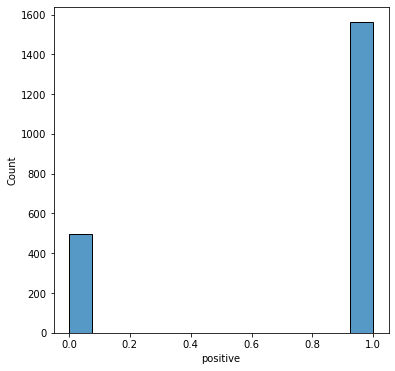

In [16]:
plt.figure(figsize=(6, 6))
sns.histplot(df["positive"])

In [17]:
df_gesamt=df['positive'].value_counts().to_frame()
df_gesamt.index=["positive","negative"]
df_gesamt

,positive
positive,1562
negative,496


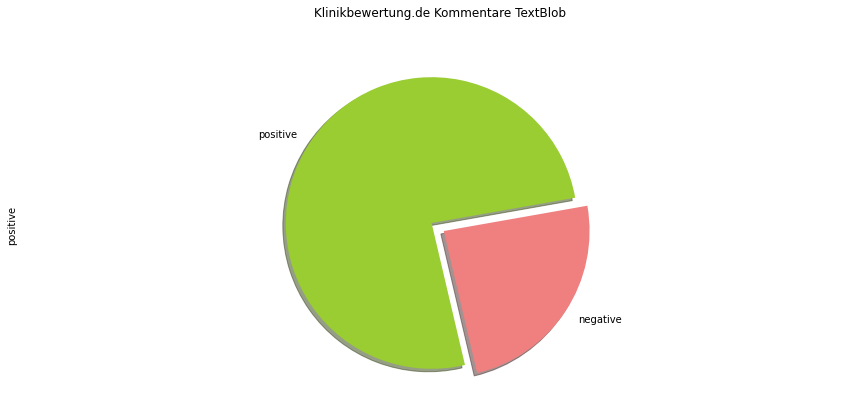

In [53]:

colors_list = ['yellowgreen', 'lightcoral']
explode_list = [0, 0.1] # ratio for each continent with which to offset each wedge.

df_gesamt['positive'].plot(kind='pie',
                            figsize=(15, 6),
                             
                            startangle=10,    
                            shadow=True,       
                                     # turn off labels on pie chart
                            pctdistance=1.1,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Klinikbewertung.de Kommentare TextBlob', y=1.12) 

plt.axis('equal') 

# add legend
#plt.legend(labels=df_gesamt.index, loc='upper left') 

plt.show()

In [19]:
df.columns

Index(['Name der Klinik', 'Titel', 'Datum', 'Fachbereich', 'Erfahrungsbericht',
       'Gesamtzufriedenheit', 'Qualität der Beratung', 'Mediz. Behandlung',
       'Verwaltung und Abläufe', 'Ausstattung und Gestaltung', 'Polaritiy',
       'Subjectivity', 'year', 'month', 'day', 'Gesamt', 'Qualität',
       'Behandlung', 'Verwaltung', 'Ausstattung', 'positive'],
      dtype='object')

In [20]:
del df['Gesamtzufriedenheit']
del df['Qualität der Beratung']
del df['Mediz. Behandlung']
del df['Verwaltung und Abläufe']
del df['Ausstattung und Gestaltung']

In [21]:
df.head()

,Name der Klinik,Titel,Datum,Fachbereich,Erfahrungsbericht,Polaritiy,Subjectivity,year,month,day,Gesamt,Qualität,Behandlung,Verwaltung,Ausstattung,positive
0,Herzogin Elisabeth Hospital,Superklinik,2021-06-07,Orthopädie,Bestens durchorganisiert.gutes Personal geht i...,0.000000,0.0,2021,6,7,100.0,100.0,100.0,100.0,100.0,1
1,Herzogin Elisabeth Hospital,Kranken- oder Hotelzimmer?,2021-05-25,Unfallchirurgie,Bin nach einem Autounfall im HEH gewesen und h...,0.340000,0.0,2021,5,25,100.0,100.0,100.0,100.0,67.0,1
2,Herzogin Elisabeth Hospital,Knie OP,2021-05-11,Orthopädie,Wurde bereits im Sept. 2020 am Knie operiert. ...,0.242857,0.0,2021,5,11,100.0,100.0,100.0,100.0,100.0,1
3,Herzogin Elisabeth Hospital,Beste Erfahrungen im HEH,2021-05-09,Chirurgie,Da ich zeit meines Lebens noch nie einen Krank...,0.536111,0.0,2021,5,9,100.0,100.0,100.0,67.0,100.0,1
4,Herzogin Elisabeth Hospital,Superkompetent und freundlich,2021-05-07,Gefäßchirurgie,Das gesamte Personal von der Notaufnahme über ...,0.428571,0.0,2021,5,7,100.0,100.0,100.0,100.0,67.0,1


In [22]:
df.to_csv('klinik_bewertungen_afterAnalysis.csv', index=False)

<h2>Analyzing Individual Feature Patterns using Visualization</h2>

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [24]:
df.describe()

,Polaritiy,Subjectivity,year,month,day,Gesamt,Qualität,Behandlung,Verwaltung,Ausstattung,positive
count,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000
mean,0.244731,0.052974,2015.191448,6.437804,15.575316,58.515549,61.852284,65.138484,57.493197,57.449951,0.758989
std,0.395254,0.089364,3.590931,3.495433,8.656824,44.886991,42.724548,42.503096,40.602514,40.171384,0.427801
min,-1.000000,0.000000,2006.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2012.000000,3.000000,8.000000,0.000000,0.000000,33.000000,0.000000,0.000000,1.000000
50%,0.221570,0.000000,2016.000000,6.000000,15.000000,67.000000,67.000000,100.000000,67.000000,67.000000,1.000000
75%,0.500000,0.081113,2018.000000,10.000000,23.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000
max,1.000000,1.000000,2021.000000,12.000000,31.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000


In [25]:
df.corr()

,Polaritiy,Subjectivity,year,month,day,Gesamt,Qualität,Behandlung,Verwaltung,Ausstattung,positive
Polaritiy,1.000000,-0.173904,0.029498,0.004027,-0.036694,0.646253,0.600801,0.595137,0.566201,0.571510,0.690007
Subjectivity,-0.173904,1.000000,0.008139,-0.019843,-0.019372,-0.137786,-0.137938,-0.122526,-0.127569,-0.135321,-0.098364
year,0.029498,0.008139,1.000000,-0.092935,-0.024204,0.050437,0.057753,0.050691,0.059770,0.023977,0.007898
month,0.004027,-0.019843,-0.092935,1.000000,-0.033776,0.018577,0.010437,0.025328,0.022747,0.038041,-0.000601
day,-0.036694,-0.019372,-0.024204,-0.033776,1.000000,0.001171,-0.006083,-0.000777,0.006079,-0.006385,-0.033033
Gesamt,0.646253,-0.137786,0.050437,0.018577,0.001171,1.000000,0.905849,0.882627,0.831651,0.872123,0.552779
Qualität,0.600801,-0.137938,0.057753,0.010437,-0.006083,0.905849,1.000000,0.885012,0.790229,0.800918,0.522800
Behandlung,0.595137,-0.122526,0.050691,0.025328,-0.000777,0.882627,0.885012,1.000000,0.758685,0.777417,0.524507
Verwaltung,0.566201,-0.127569,0.059770,0.022747,0.006079,0.831651,0.790229,0.758685,1.000000,0.774485,0.479283
Ausstattung,0.571510,-0.135321,0.023977,0.038041,-0.006385,0.872123,0.800918,0.777417,0.774485,1.000000,0.472392


In [26]:
df[['Polaritiy', 'Gesamt',"positive"]].corr()  

,Polaritiy,Gesamt,positive
Polaritiy,1.000000,0.646253,0.690007
Gesamt,0.646253,1.000000,0.552779
positive,0.690007,0.552779,1.000000


In [27]:
df.columns

Index(['Name der Klinik', 'Titel', 'Datum', 'Fachbereich', 'Erfahrungsbericht',
       'Polaritiy', 'Subjectivity', 'year', 'month', 'day', 'Gesamt',
       'Qualität', 'Behandlung', 'Verwaltung', 'Ausstattung', 'positive'],
      dtype='object')

In [28]:
df[['Qualität','Behandlung', 'Verwaltung', 'Ausstattung']].corr()  

,Qualität,Behandlung,Verwaltung,Ausstattung
Qualität,1.000000,0.885012,0.790229,0.800918
Behandlung,0.885012,1.000000,0.758685,0.777417
Verwaltung,0.790229,0.758685,1.000000,0.774485
Ausstattung,0.800918,0.777417,0.774485,1.000000


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='positive', ylabel='Density'>

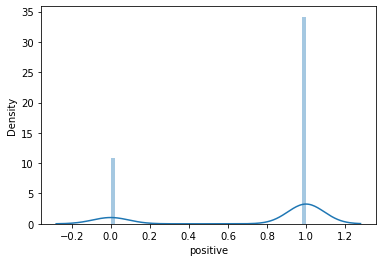

In [29]:
sns.distplot(df["positive"])

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Polaritiy', ylabel='Density'>

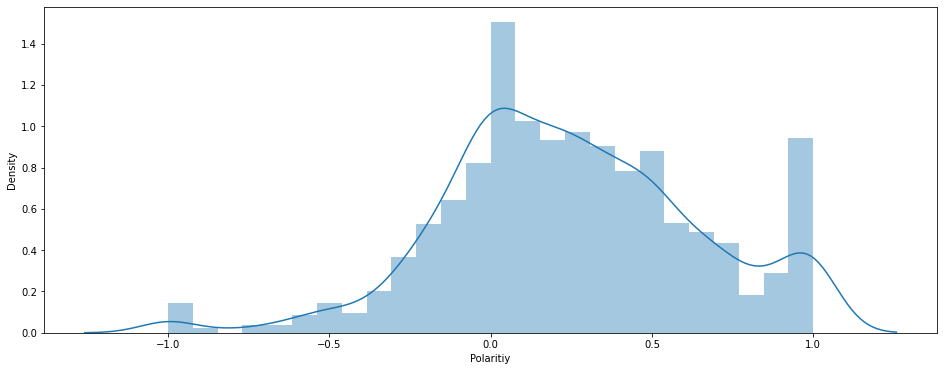

In [30]:
plt.figure(figsize=(16, 6))
sns.distplot(df["Polaritiy"])

<AxesSubplot:xlabel='Polaritiy', ylabel='Density'>

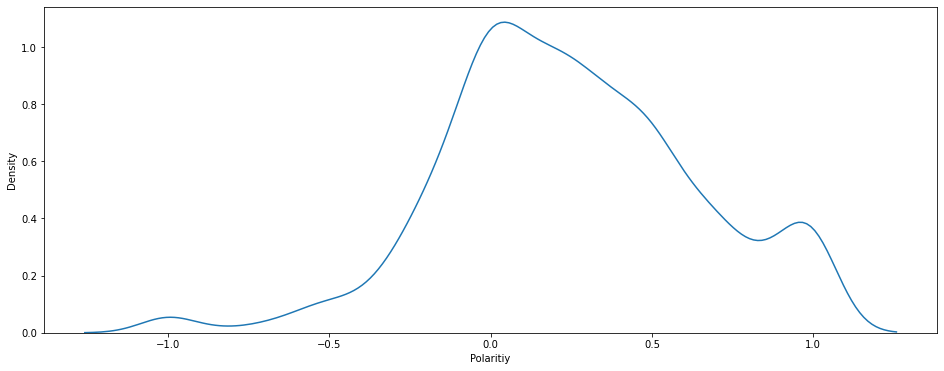

In [31]:
plt.figure(figsize=(16, 6))
sns.kdeplot(df["Polaritiy"])

<AxesSubplot:xlabel='Polaritiy', ylabel='Count'>

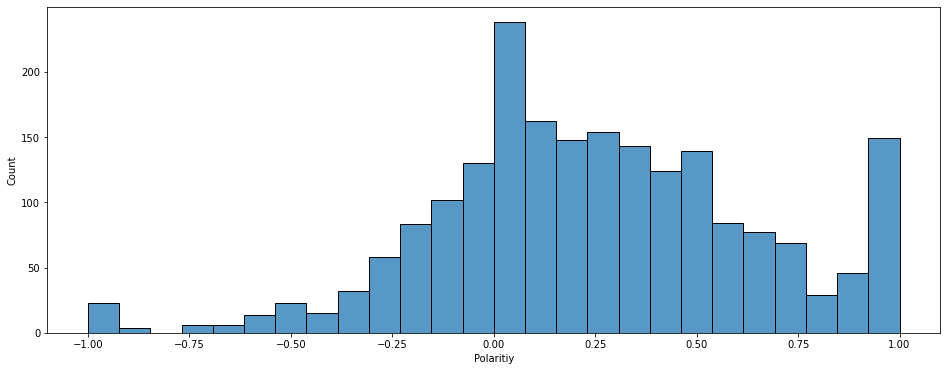

In [32]:
plt.figure(figsize=(16, 6))
sns.histplot(df["Polaritiy"])

<AxesSubplot:xlabel='Subjectivity', ylabel='Count'>

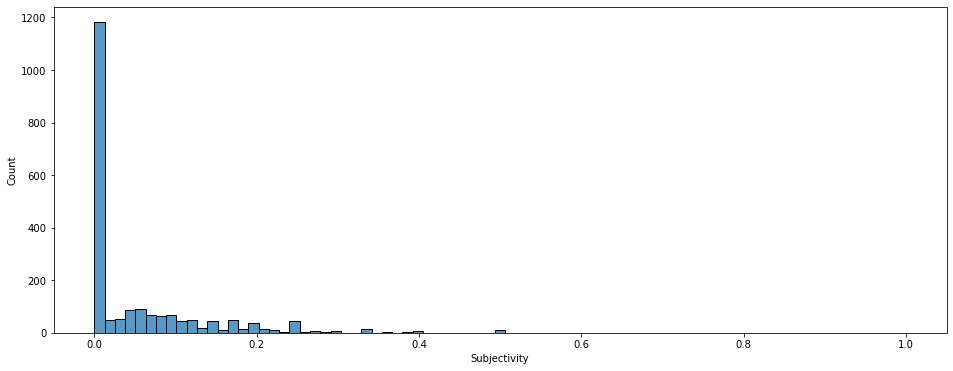

In [33]:
plt.figure(figsize=(16, 6))
sns.histplot(df["Subjectivity"])

In [34]:
dff=df[df["Polaritiy"]>=0.1]
dff.shape

(1284, 16)

In [35]:
dff=df[df["Gesamt"]>=50]
dff.shape

(1229, 16)

<AxesSubplot:xlabel='Polaritiy', ylabel='Count'>

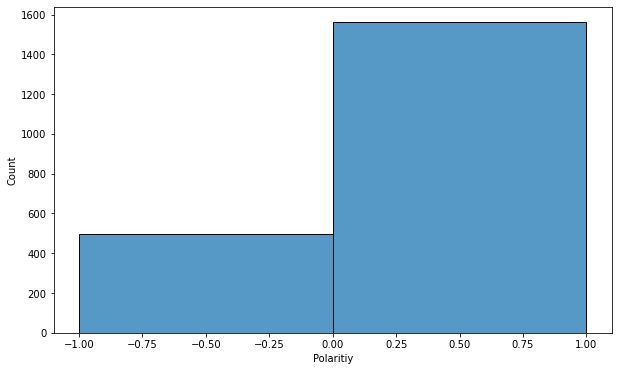

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Polaritiy"],bins=2)

<AxesSubplot:xlabel='Gesamt', ylabel='Count'>

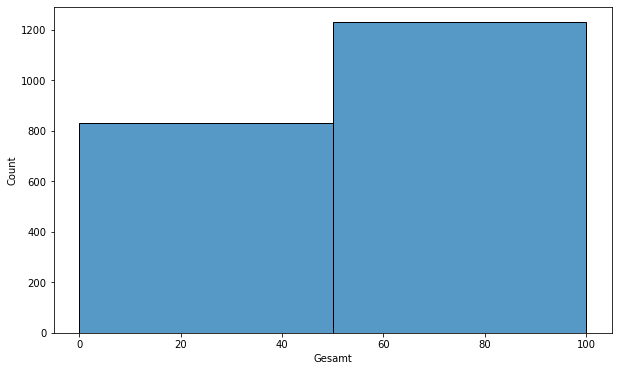

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Gesamt"],bins=2)

<AxesSubplot:xlabel='Subjectivity', ylabel='Count'>

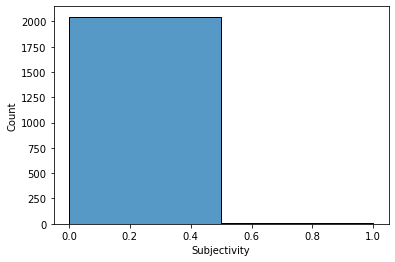

In [38]:
sns.histplot(df["Subjectivity"],bins=2)

<AxesSubplot:xlabel='Gesamt', ylabel='Count'>

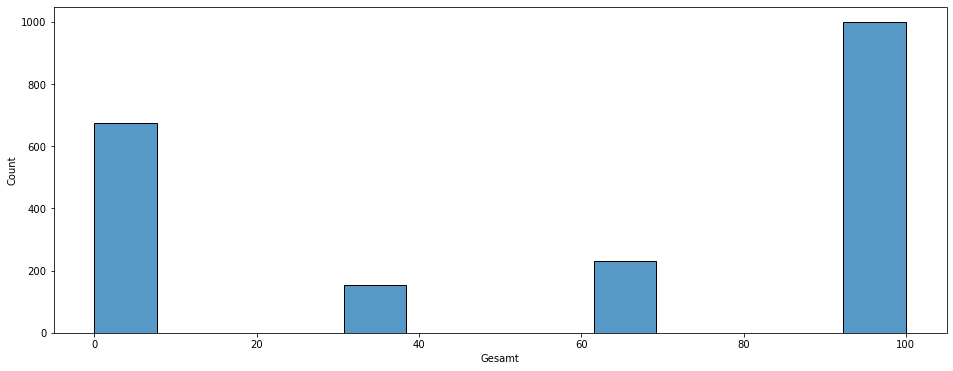

In [39]:
plt.figure(figsize=(16, 6))
sns.histplot(df["Gesamt"])

<AxesSubplot:xlabel='Qualität', ylabel='Density'>

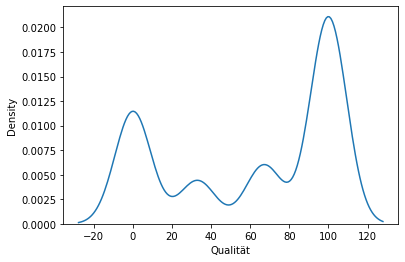

In [40]:
sns.kdeplot(df["Qualität"])

<AxesSubplot:xlabel='Qualität', ylabel='Count'>

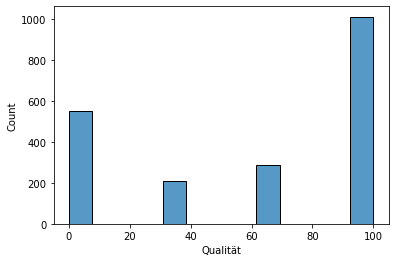

In [41]:
sns.histplot(df["Qualität"])

<AxesSubplot:xlabel='Behandlung', ylabel='Density'>

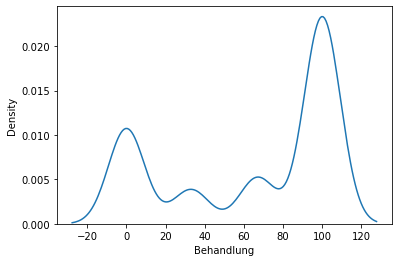

In [42]:
sns.kdeplot(df["Behandlung"])

<AxesSubplot:xlabel='Verwaltung', ylabel='Density'>

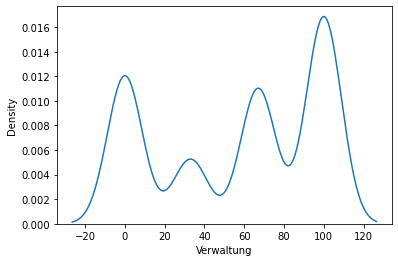

In [43]:
sns.kdeplot(df["Verwaltung"])

<AxesSubplot:xlabel='Ausstattung', ylabel='Density'>

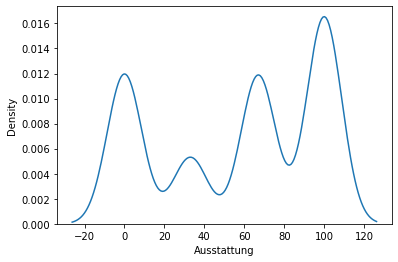

In [44]:
sns.kdeplot(df["Ausstattung"])

<AxesSubplot:xlabel='Gesamt', ylabel='Density'>

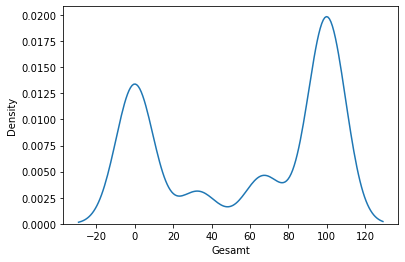

In [45]:
sns.kdeplot(df["Gesamt"])

<AxesSubplot:xlabel='Polaritiy', ylabel='Count'>

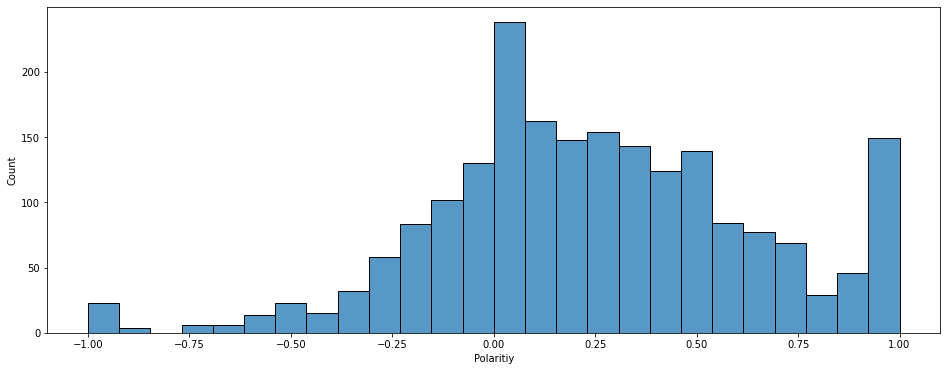

In [46]:
plt.figure(figsize=(16, 6))
sns.histplot(df["Polaritiy"])

<AxesSubplot:xlabel='Gesamt', ylabel='Count'>

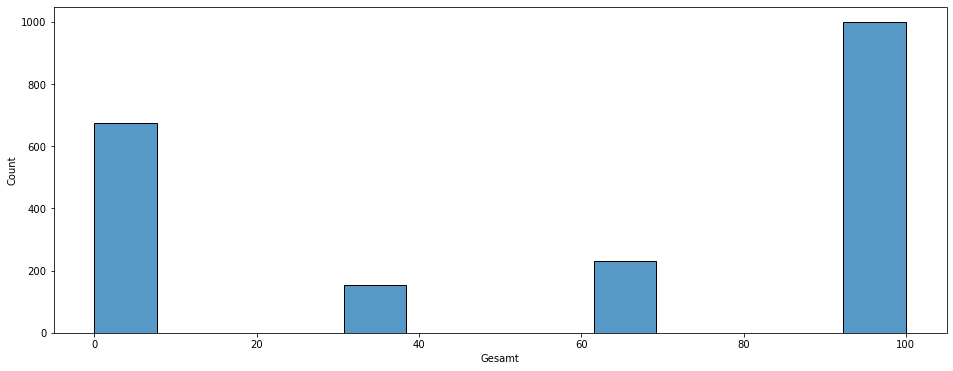

In [47]:
plt.figure(figsize=(16, 6))
sns.histplot(df["Gesamt"])

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Gesamt', ylabel='Density'>

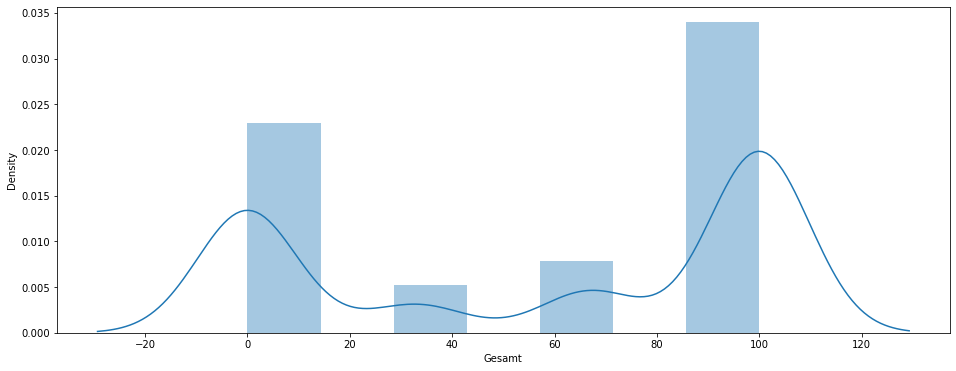

In [48]:
plt.figure(figsize=(16, 6))
sns.distplot(df["Gesamt"])

In [49]:
df.columns

Index(['Name der Klinik', 'Titel', 'Datum', 'Fachbereich', 'Erfahrungsbericht',
       'Polaritiy', 'Subjectivity', 'year', 'month', 'day', 'Gesamt',
       'Qualität', 'Behandlung', 'Verwaltung', 'Ausstattung', 'positive'],
      dtype='object')

In [50]:
df[['Polaritiy','Gesamt','positive']].describe()

,Polaritiy,Gesamt,positive
count,2058.000000,2058.000000,2058.000000
mean,0.244731,58.515549,0.758989
std,0.395254,44.886991,0.427801
min,-1.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,0.221570,67.000000,1.000000
75%,0.500000,100.000000,1.000000
max,1.000000,100.000000,1.000000


In [51]:
df[["Name der Klinik","Fachbereich","Erfahrungsbericht"]].describe(include=['object'])

,Name der Klinik,Fachbereich,Erfahrungsbericht
count,2058,2058,2058
unique,17,35,2058
top,DIAKOVERE Henriettenstift,Orthopädie,Meine Frau wurde im August 2009 an einem Kramp...
freq,241,269,1


In [52]:
df['Gesamt'].value_counts().to_frame()

,Gesamt
100.0,999
0.0,674
67.0,230
33.0,155


End...